### Data Visualisation

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import missingno as msno
file = pd.read_csv('NAC_data.csv')
NAC_data = pd.DataFrame(file)

In [98]:
print(NAC_data.columns.tolist())

['Unnamed: 0', 'Team', 'Team within selected timeframe', 'Position', 'Age', 'Market value', 'Contract expires', 'Matches played', 'Minutes played', 'Goals', 'xG', 'Assists', 'xA', 'Duels per 90', 'Duels won, %', 'Birth country', 'Passport country', 'Foot', 'Height', 'Weight', 'On loan', 'Successful defensive actions per 90', 'Defensive duels per 90', 'Defensive duels won, %', 'Aerial duels per 90', 'Aerial duels won, %', 'Sliding tackles per 90', 'PAdj Sliding tackles', 'Shots blocked per 90', 'Interceptions per 90', 'PAdj Interceptions', 'Fouls per 90', 'Yellow cards', 'Yellow cards per 90', 'Red cards', 'Red cards per 90', 'Successful attacking actions per 90', 'Goals per 90', 'Non-penalty goals', 'Non-penalty goals per 90', 'xG per 90', 'Head goals', 'Head goals per 90', 'Shots', 'Shots per 90', 'Shots on target, %', 'Goal conversion, %', 'Assists per 90', 'Crosses per 90', 'Accurate crosses, %', 'Crosses from left flank per 90', 'Accurate crosses from left flank, %', 'Crosses from 

---

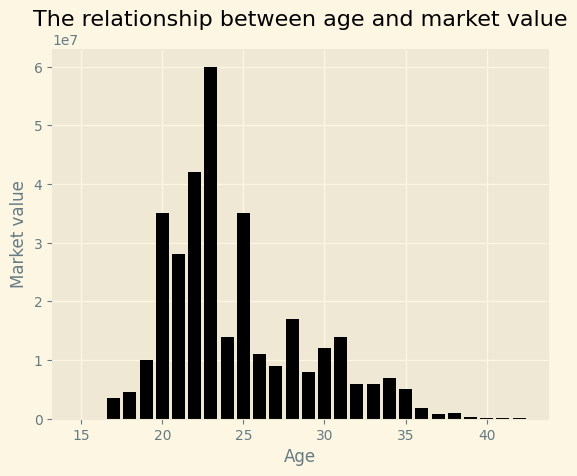

In [34]:
fig, ax = plt.subplots()
plt.style.use('Solarize_Light2')

# Plotting the relationship between age and market value using a bar plot
ax.bar(NAC_data['Age'], NAC_data['Market value'], color= 'black')
ax.set_xlabel('Age')
ax.set_ylabel('Market value')
plt.title('The relationship between age and market value')
plt.show()

As age increases, market value decreases, which suggests that the younger the player is, the more valuable to the team.

---

Median age of players is 25.0


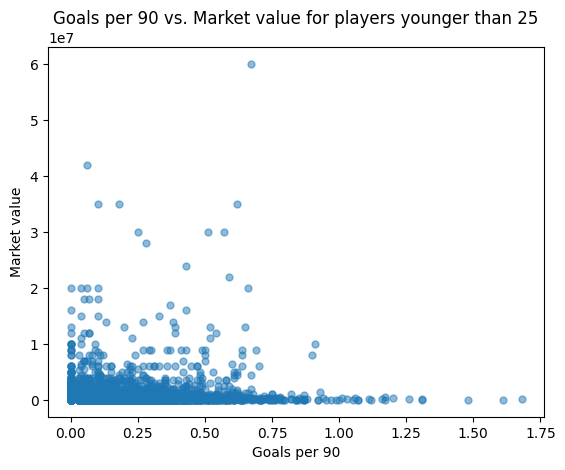

In [5]:
fig, ax = plt.subplots()

# Calculating the median age of players
mid_age = NAC_data['Age'].median()
print(f'Median age of players is {mid_age}')

# Selecting players younger than or equal to the median age
younger_players = NAC_data[NAC_data['Age'] <= mid_age]

#Scatter plot
ax.scatter(younger_players['Goals per 90'], younger_players['Market value'], s=25, alpha=0.5)
ax.set_xlabel('Goals per 90')
ax.set_ylabel('Market value')
plt.title('Goals per 90 vs. Market value for players younger than 25')
plt.show()

From the graph, we can deduct that there isn't a strong correlation between the number of goals per match and player market value. I have selected only younger players because the data suggests that the lower the age of a player is, the higher the market value, and therefore the player is perceived as more valuable

---

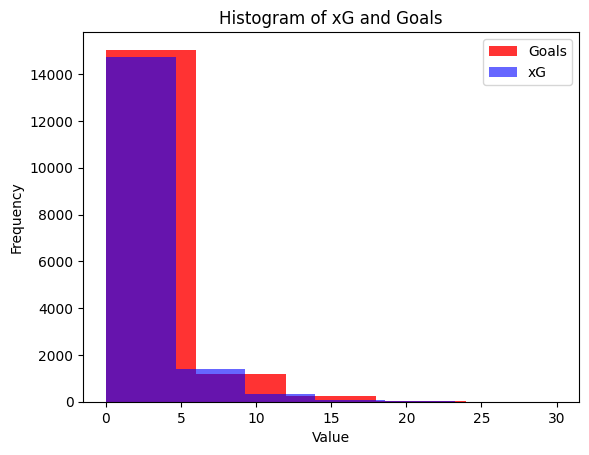

In [23]:
fig, ax = plt.subplots()

# Using the 'xG' and 'Goals' columns, dropping NaN values
xG_values = NAC_data['xG'].dropna()
Goals_values = NAC_data['Goals'].dropna()

# Histogram
ax.hist(Goals_values, bins=5, color='red', alpha=0.8, label='Goals')
ax.hist(xG_values, bins=5, color='blue', alpha=0.6, label='xG')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
plt.title('Histogram of xG and Goals')
plt.legend()
plt.show()

The distribution of expected goals compared to actual goals is very similar across the whole dataset, which could indicate that each team is overall efficient in converting chances into goals (also indicated because of the right-skewed distribution).

---

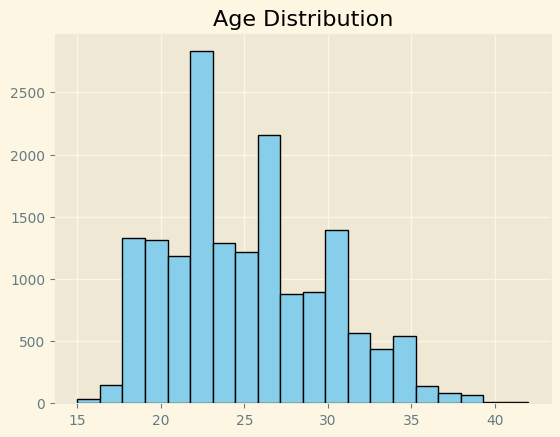

In [77]:
fig, ax = plt.subplots()

#Histogram for the age distribution across all players
ax.hist(NAC_data['Age'], bins=20, color='skyblue', edgecolor='black')
ax.set_title('Age Distribution')
plt.show()

The majority of players seem to be in the younger age groups, with a peak around 23 years old.

---

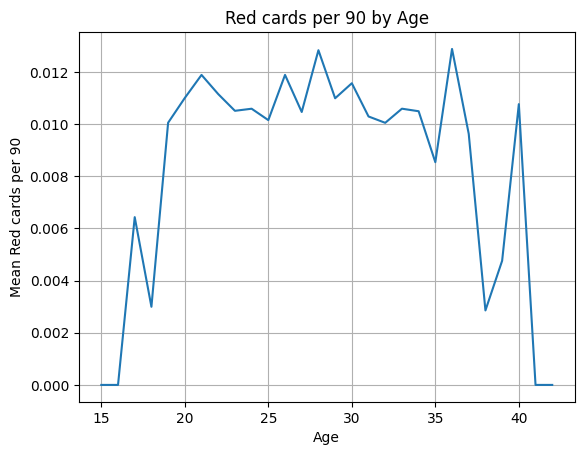

In [28]:
# Filtering the mean of the red cards per match by player age
age_red_cards_trend = NAC_data.groupby('Age')['Red cards per 90'].mean()

# Line chart
fig, axs = plt.subplots()
axs.plot(age_red_cards_trend.index, age_red_cards_trend) 
axs.set_title('Red cards per 90 by Age')
axs.set_xlabel('Age')
axs.set_ylabel('Mean Red cards per 90')
axs.grid(True)
plt.show()

Players aged around 33 seem to receive the most red cards per 90 minutes of play.